<a href="https://colab.research.google.com/github/YasirHabib/tensorflow/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [279]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/fashion-mnist_train.csv')

In [0]:
df_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/fashion-mnist_test.csv')

In [0]:
data_train = df_train.values
data_test = df_test.values

Xtrain = data_train[:,1:]
Ytrain = data_train[:,0]

Xtest = data_test[:,1:]
Ytest = data_test[:,0]

In [0]:
# Normalization
Xtrain = (Xtrain - Xtrain.mean(axis=0)) / Xtrain.std(axis=0)
Xtest = (Xtest - Xtest.mean(axis=0)) / Xtest.std(axis=0)

In [0]:
N, D = Xtrain.shape
K = len(set(Ytrain))
M = 128

In [0]:
def y2indicator(Y):
  N = len(Y)
  K = len(set(Y))
  ind=np.zeros((N,K))
  for L in range(N):
    ind[L,Y[L]]=1
  
  return ind

In [0]:
Ytrain_ind = y2indicator(Ytrain)
Ytest_ind = y2indicator(Ytest)

In [0]:
W1 = np.random.randn(D, M) / np.sqrt(D)
b1 = np.zeros(M)

W2 = np.random.randn(M, K) / np.sqrt(M)
b2 = np.zeros(K)

In [0]:
def gradW2(Z, pY, T):
  return Z.T.dot(pY - T)

In [0]:
def gradb2(pY, T):
  return (pY - T).sum(axis = 0)

In [0]:
def gradW1(X, W2, Z, pY, T):
  dZ = (pY - T).dot(W2.T) * (Z > 0)		# relu
  return X.T.dot(dZ)

In [0]:
def gradb1(W2, Z, pY, T):
  dZ = (pY - T).dot(W2.T) * (Z > 0)		# relu
  return dZ.sum(axis = 0)

In [0]:
def forward(X, W1, b1, W2, b2):
  Z = X.dot(W1) + b1
  Z[Z < 0] = 0				# relu
  
  A = Z.dot(W2) + b2
  expA = np.exp(A)
  pY = expA / expA.sum(axis=1, keepdims=True)
  
  return Z, pY

In [0]:
def cost(pY, Y):
	return -(Y * np.log(pY)).sum()

In [0]:
def error_rate(pY, Y):
  return np.mean(Y != np.argmax(pY, axis=1))

Epoch 1 : cost = 17196.7195110879 error rate = 0.5907
Epoch 1 : cost = 13795.461167348343 error rate = 0.4105
Epoch 1 : cost = 11947.216400795252 error rate = 0.3657
Epoch 1 : cost = 10791.574354264798 error rate = 0.3275
Epoch 1 : cost = 10056.955469773919 error rate = 0.3098
Epoch 1 : cost = 9533.780660559907 error rate = 0.3031
Epoch 1 : cost = 9005.558702330942 error rate = 0.2932
Epoch 1 : cost = 8621.829512528488 error rate = 0.2759
Epoch 1 : cost = 8477.421043021519 error rate = 0.2907
Epoch 1 : cost = 8113.713823887441 error rate = 0.267
Epoch 1 : cost = 7935.348967416926 error rate = 0.2673
Epoch 1 : cost = 7710.958364229429 error rate = 0.2565
Epoch 1 : cost = 7542.16208247386 error rate = 0.2529
Epoch 1 : cost = 7563.701390657717 error rate = 0.2649
Epoch 1 : cost = 7359.693564321246 error rate = 0.2475
Epoch 1 : cost = 7173.377739902831 error rate = 0.242
Epoch 1 : cost = 7060.952832671518 error rate = 0.2371
Epoch 1 : cost = 6940.213092093601 error rate = 0.235
Epoch 1 : c

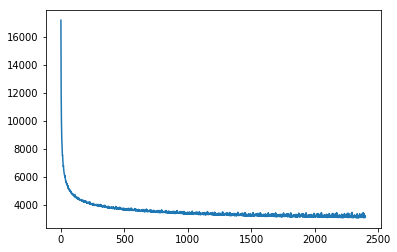

Elapsted time for 10 epoches: 0:05:15.156230


In [295]:
learning_rate = 0.0002
training_epochs = 20
batch_sz = 500
n_batches = N // batch_sz
costs = []
t0 = datetime.now()

for epoch in range(training_epochs):
  for j in range(n_batches):
    Xbatch = Xtrain[j*batch_sz:(batch_sz+(j*batch_sz)), :]
    Ybatch = Ytrain_ind[j*batch_sz:(batch_sz+(j*batch_sz)), :]
    
    Z, pY = forward(Xbatch, W1, b1, W2, b2)
    
    W2 -= learning_rate * gradW2(Z, pY, Ybatch)
    b2 -= learning_rate * gradb2(pY, Ybatch)
    W1 -= learning_rate * gradW1(Xbatch, W2, Z, pY, Ybatch)
    b1 -= learning_rate * gradb1(W2, Z, pY, Ybatch)
    
    if j % 1 == 0:
      _,pY_test = forward(Xtest, W1, b1, W2, b2)
      c = cost(pY_test, Ytest_ind)
      costs.append(c)
      e = error_rate(pY_test, Ytest)
      print("Epoch", (epoch + 1), ": cost =", c, "error rate =", e)
      
plt.plot(costs, label="cost")
plt.show()

print("Elapsted time for 10 epoches:", datetime.now() - t0)
